## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### 1. Изучение общей информации 

In [6]:
import pandas as pd
pd.set_option('display.max_columns', None) 

In [7]:
clients_data = pd.read_csv('/datasets/data.csv')



clients_data.info() 

clients_data.head(10) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### Вывод

1. Датафрейм состоит из 21525 строк и 12 столбцов, содержащих характеристики заемщиков, и из которых 5 столбцов содержат категориальные переменные (сведения об образовании, семейном положении, поле, источнике доходов и цели кредита).

2. По колонкам days_employed и total_income просматриваются пропущенные значения. Одной из возможных причин такого пропуска может выступать особенности типа занятости заемщика - например, гражданин не работает "официально" (по трудовому договору), либо является "самозанятым" и также не имеет возможности официального подтверждения такого дохода. В этом случае пропуски вполне объяснимы.

### 2. Предобработка данных

### Обработка пропусков

In [16]:
mean = dict()

#замена пропусков в доходах на среднее значение по категории доходов
for i in clients_data['income_type'].unique():
    mean[i] = clients_data[clients_data['income_type'] == i]['total_income'].mean()
    
def fill_null(data):
    if pd.isnull(data['total_income']):
        return data['total_income'] == mean[data['income_type']]
    else:
        return data['total_income']
    
# Строку ниже следовало писать перед созданием словаря для стажа

clients_data['total_income'] = clients_data.apply(fill_null, axis=1)

#пропусков в стаже на среднее значение по категории доходов
mean = dict()
for i in clients_data['income_type'].unique():
    mean[i] = clients_data[clients_data['income_type'] == i]['days_employed'].mean()
def fill_null(data):
    if pd.isnull(data['days_employed']):
        return data['days_employed'] == mean[data['income_type']]
    else:
        return data['days_employed']

    
clients_data['days_employed'] = clients_data.apply(fill_null, axis=1) 


clients_data.isnull().sum()

clients_data.head(10)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,жилье
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,жилье
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,жилье
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,жилье
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,свадьба
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,жилье


1. Выведение общей информации о пропущенных значениях: в столбцах "days_employed" и "total_income" количество пропущенных значений составляет 2174.
2. Выведение пропущенных значений в срезе категорий доходов: наиболее многочисленные группы категорий доходов с пропущенными значениями составляют: "сотрудник" - 1105, "компаньон" - 508, "пенсионер" - 413. Считаю, что категориями "госслужащий" и "предприниматель" можно пренебречь ввиду их немногочисленности и в дальнейшем удалить.
3. При проверке данных о возрасте клиентов были выявлены некоторые категории, в которыъ возраст ошибочно равено нулю (0). Учитывая, что количество таких "ошибочных клиентов" невелико (около 100 чел.), считаю что нулевые значения можно не менять.

 
 

### Замена типа данных

In [17]:
#замена float на int
clients_data['days_employed'] = clients_data['days_employed'].astype(int)
clients_data['total_income'] = clients_data['total_income'].astype(int)

#замена отрицательных значений на абсолютные 
clients_data['total_income'] = clients_data['total_income'].abs()
clients_data['days_employed'] = clients_data['days_employed'].abs()
clients_data['children'] = clients_data['children'].abs()
clients_data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,жилье
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,жилье
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,жилье
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,жилье
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,свадьба
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,жилье


### Вывод

В колонке days_employed и total_income были обнаружены вещественные типы данных, что не может быть верным. Была произведена замена методом astype на целочисленные значения.

### Обработка дубликатов

In [18]:
clients_data['education'] = clients_data['education'].str.lower()
clients_data = clients_data.drop_duplicates()
clients_data = clients_data.dropna().reset_index(drop=True)
clients_data.duplicated().sum()


0

### Вывод

За счет разных регистров визуально были выявлены дубликаты в колонке education.
Также с применением стандартных методов duplicates() были выявлены и удалены дубликаты.

### Лемматизация

In [19]:
from pymystem3 import Mystem

In [20]:
#выведение уникальных значений для создания выборки для целей лемматизации 
clients_data['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
жилье                                     646
покупка жилья                             646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

In [21]:
#из выведенных выше категорий целей кредита были отобраны уникальные значения со следующими леммами

purpose_type = ['жилье', 'автомобиль', 'свадьба', 'образование', 'недвижимость', 'коммерческий', 'сдача']
m = Mystem()
def lemmatization(text):
    lemma = m.lemmatize(text)
    for word in purpose_type:
        if word in lemma:
            lemma = word
    return lemma

clients_data['purpose_category'] = clients_data['purpose'].apply(lemmatization)



clients_data.head(10)




,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,жилье
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,жилье
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,жилье
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,жилье
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,свадьба
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,жилье


### Вывод

С помощью метода data['purpose'].value_counts() были выведены уникальные значения из колонки purpose и вручную отобраны ключевые слова и выведены в список 'purpose_type'

### Категоризация данных

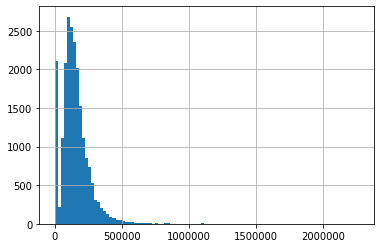

In [25]:

clients_data['total_income'].describe()

clients_data['total_income'].hist(bins=100)


In [52]:
clients_data['total_income'].describe()

count    2.145400e+04
mean     1.510105e+05
std      1.097366e+05
min      0.000000e+00
25%      8.908850e+04
50%      1.357810e+05
75%      1.958132e+05
max      2.265604e+06
Name: total_income, dtype: float64

Сделав гистограмму по уровню доходов, мы видим большой разброс по уроввню доходов. Т.е. большинство заемщиков имеют доход < 25 000. На основании такого распределения доходов проведем категоризацию ниже.

In [32]:
def income_category(amount):
    if amount <= 50000:
        return 'низкий'
    if 50001 <= amount <= 100000:
        return 'ниже среднего'
    if 100001 <= amount <= 350000:
        return 'средний'
    else:
        return 'высокий'
    
clients_data['income_category'] = clients_data['total_income'].apply(income_category)

def age_category(age):
    if age <= 28:
        return 'молодежь'
    if 29 <= age <= 34:
        return 'миллениалы'
    if 35 <= age <= 55:
        return 'взрослые'
    else:
        return 'пенсионеры'
clients_data['age_category'] = clients_data['dob_years'].apply(age_category)




### Вывод

По возрасту были выделены 4 группы: "молодежь" - моложе 28 лет, "миллениалы"  - от 28 до 34, "взрослые" - от 34 до 55, и "пенсионеры" - старше 55.

По уровню доходов были выделены 4 группы: "низкий" - менее 5 000, "ниже среднего" - от 5 000 до 10 000, "средний" - от 10 000 до 20 000, "высокий" - более 20 000.





---
## Комментарий от наставника

Только вот мы не знаем регион, по которому у нас данные. Только 2 выделенные группы можно назвать презентабельными. Оставшиеся две имеют слишком мало клиентов. Лучше использовать разбиение по квантилям данных (метод qcut). Или же можно узнать в интернете процентный состав общества по доходам и затем уже категоризовать столбец с доходами по найденному соотношению с помощью персентилей. 

---

### 3. Исследование отдельных вопросов

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [29]:


data_pivot = clients_data.pivot_table(index = ['children'], columns = 'debt', values = 'gender', aggfunc = 'count')
data_pivot['ratio'] = data_pivot[1] / (data_pivot[0] + data_pivot[1])

data_pivot




debt,0,1,ratio
children,,,
0,13028.0,1063.0,0.075438
1,4410.0,445.0,0.091658
2,1858.0,194.0,0.094542
3,303.0,27.0,0.081818
4,37.0,4.0,0.097561
5,9.0,NaN,NaN
20,68.0,8.0,0.105263


### Вывод

Как видим, наличие детей у должника не гарантирует уплату кредита в срок.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [55]:
data_pivot = clients_data.pivot_table(index = ['family_status'], columns = 'debt', values = 'gender', aggfunc = 'count')
data_pivot['ratio'] = data_pivot[1] / (data_pivot[0] + data_pivot[1])

data_pivot

debt,0,1,ratio
family_status,,,
Не женат / не замужем,2536,274,0.097509
в разводе,1110,85,0.071130
вдовец / вдова,896,63,0.065693
гражданский брак,3763,388,0.093471
женат / замужем,11408,931,0.075452


### Вывод

Неженатые и сожительствующие граждане менее склонны возвращать кредит в срок.

---
## Комментарий от наставника

Вывод не противоречит полученному результату. 

---

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [31]:
data_pivot = clients_data.pivot_table(index = ['income_category'], columns = 'debt', values = 'gender', aggfunc = 'count')
data_pivot['ratio'] = data_pivot[1] / (data_pivot[0] + data_pivot[1])
data_pivot

debt,0,1,ratio
income_category,,,
высокий,803,55,0.064103
ниже среднего,3760,331,0.080909
низкий,2282,193,0.077980
средний,12868,1162,0.082823


### Вывод

Более всего дисциплинированы в возврате кредитов граждане с доходами "средний" и "ниже среднего".



- Как разные цели кредита влияют на его возврат в срок?

In [57]:
data_pivot = clients_data.pivot_table(index = ['purpose_category'], columns = 'debt', values = 'gender', aggfunc = 'count')
data_pivot['ratio'] = data_pivot[1] / (data_pivot[0] + data_pivot[1])
data_pivot

debt,0,1,ratio
purpose_category,,,
автомобиль,3903,403,0.093590
жилье,4152,308,0.069058
недвижимость,5877,474,0.074634
образование,3643,370,0.092200
свадьба,2138,186,0.080034


### Вывод

У берущих кредиты на жилье и прочую недвижимость меньший показатель дефолтов. 

### Шаг 4. Общий вывод

Была проведена предварительная обработка датафрейма.

Изучив общую информацию о структуре данных и произведя визуальное наблюдение, были выявлены недостатки в отражении данных:
(1) Содержались пропущенные значения по столбцам "days_employed" и "total_income". Была произведена замена на средние значения значения, так как налицо большой разрыв в доходах и клиентов с действительно высокими доходами не много.

(2) Значения стажа и дохода были приведены к целочислинным значениям. 

(3) Было произведено ручное (изменение регистра) и автоматическое удаление дуликатов методом dropna().

(4) Относительно зависимости возврата кредита в срок от различных характеристики клиентов можно сделать следующие выводы:


 - Наличие и количество детей существенно не влияет на воказатель возвратности кредитов. 
 - Кредиты на жилье и прочую недвижимость, включая коммерческую, платятся более исправно, так как, скорее всего находятся в залоге, и у заемщика есть риск расстаться с жильем или объектом инвестирования, то есть из-за юридических рисков.
 - Граждане, состоящие в браке, более дисциплинированы в возврате кредитов.
 - Граждане с доходами "средний" и "ниже среднего" являются самыми исправными должниками.